In [171]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [172]:
adult_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]
df = pd.read_csv("adult.data", names=adult_names)


In [173]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [174]:
encoder = LabelEncoder()

for col in adult_names:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])

scaler = MinMaxScaler()
adult = scaler.fit_transform(df)


In [175]:
X, y = adult[:, :-1], adult[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [196]:
mse = Sequential([
    Dense(units=10, input_dim= X.shape[1], activation="tanh"),
    Dense(units=24,activation="tanh"),
    Dense(units=16,activation="tanh"),
    Dense(units=8,activation="tanh"),
    Dense(units=1, activation="tanh")
])
mse.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 10)                150       
                                                                 
 dense_106 (Dense)           (None, 24)                264       
                                                                 
 dense_107 (Dense)           (None, 16)                400       
                                                                 
 dense_108 (Dense)           (None, 8)                 136       
                                                                 
 dense_109 (Dense)           (None, 1)                 9         
                                                                 
Total params: 959
Trainable params: 959
Non-trainable params: 0
_________________________________________________________________


In [197]:
mse.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
history_mse = mse.fit(X_train, y_train, epochs=15, validation_split=0.2,verbose=0)


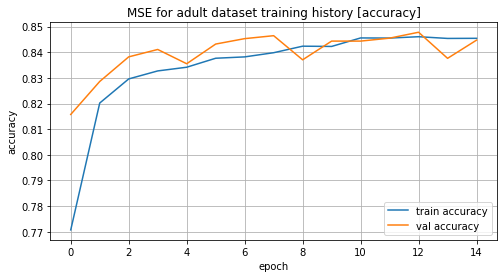

In [199]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

plot_history(history=history_mse, metrics=["accuracy"],model_name="MSE for adult dataset")


In [179]:
housing_names = ["f" + str(i) for i in range(7)] + ["price"]
housing = pd.read_excel("Real-estate-valuation-data-set.xlsx", names=housing_names)

In [180]:
housing.sample(3)

,f0,f1,f2,f3,f4,f5,f6,price
314,315,2013.25,3.7,577.9615,6,24.97201,121.54722,41.6
355,356,2013.25,3.8,383.8624,5,24.98085,121.54391,60.7
118,119,2013.50,25.3,1583.7220,3,24.96622,121.51709,30.6


In [181]:
housing = scaler.fit_transform(housing)
X_housing, y_housing = housing[:, :-1], housing[:, -1]
print(X_housing.shape, y_housing.shape)

(414, 7) (414,)


In [182]:
x_train_housing, x_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, train_size=0.8)

In [193]:
hs_mse = Sequential([
    Dense(units=16, input_dim= X_housing.shape[1], activation="tanh"),
    Dense(units=8, activation = "tanh"),
    Dense(units=8, activation="tanh"),
    Dense(units = 8, activation= "tanh"),
    Dense(units = 8, activation= "tanh"),
    Dense(units=1)
])
hs_mse.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                128       
                                                                 
 dense_100 (Dense)           (None, 8)                 136       
                                                                 
 dense_101 (Dense)           (None, 8)                 72        
                                                                 
 dense_102 (Dense)           (None, 8)                 72        
                                                                 
 dense_103 (Dense)           (None, 8)                 72        
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 489
Trainable params: 489
Non-trainable

In [194]:
hs_mse.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

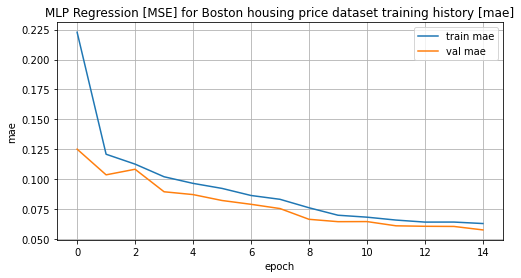

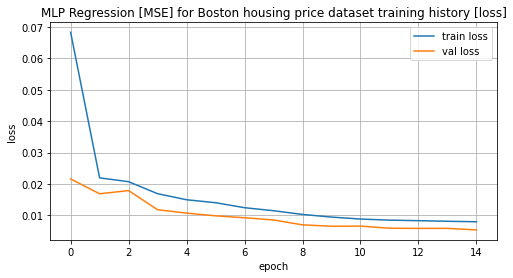

In [195]:
history_hs_mse = hs_mse.fit(x_train_housing, y_train_housing, epochs=15, verbose=0, validation_split=0.2)

plot_history(history_hs_mse, metrics=["mae"], model_name="MLP Regression [MSE] for Boston housing price dataset")
plot_history(history_hs_mse, metrics=["loss"], model_name="MLP Regression [MSE] for Boston housing price dataset")